In [1]:
import re
import math
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
# 인기 급상승 동영상 데이터 프레임
youtube_50_table = pd.read_csv(f'youtube_50_table_pre.csv')
# 같은 제목의 다른 동영상이 있기 때문에 변경
for idx in youtube_50_table[youtube_50_table['제목'] == '병문안'].loc[20477:].index:
    youtube_50_table.loc[idx, '제목'] = '병문안2'

In [4]:
# 이상치 반환
def outlier(arr):
    if type(arr) == list:
        arr = np.array([arr])
        q1 = np.percentile(arr, 25)
        q3 = np.percentile(arr, 75) 
    elif type(arr) == pd.core.series.Series:
        q1 = arr.quantile(.25)
        q3 = arr.quantile(.75)
    uc = round(int(q3 + 1.5 * (q3 - q1)),-1)
    lc = round(int(q1 - 1.5 * (q3 - q1)),-1)
    return uc,lc

In [28]:
# 분석 1 --------------------------------------------------------------------------------------
def analysis(column):
    # 이상치 제거
    uc,lc = outlier(youtube_50_table[column])
    youtube = youtube_50_table[(youtube_50_table['제목'].duplicated(keep=False))&(youtube_50_table[column]<uc)]
    
    # 분석 컬럼 확인
    idx = list(youtube_50_table.columns).index(column)
    
    # 증가량, 기간 개수 저장 공간
    plot_y = {}
    plot_y_count = []
    
    # 저장 공간 정수형으로 변경 작업
    for key in range(0,youtube_50_table['게시날'].max()+1):
        plot_y[key] =0
        plot_y_count.append(0)
        
    for title in youtube['제목'].unique():
        # 선정 마지막 날 데이터
        now = youtube[youtube['제목'] == title].iloc[-1,idx]
        # 선정 시작 날 데이터
        start = youtube[youtube['제목'] == title].iloc[0,idx]
        # 선정 기간
        day = youtube[youtube['제목'] == title].iloc[-1,3] - youtube[youtube['제목'] == title].iloc[0,3]
        # 데이터 저장
        plot_y[day] += now-start
        plot_y_count[day] += 1
        
    print(f'{column} 상승')
    max_range = 0
    range_p = plot_y_count[:]
    # 자료 개수 5개 이하면 삭제
    for i, v in enumerate(range_p, 0):
        if v < 5:
            del plot_y[i]
            plot_y_count.remove(v) 
    
    for key,value in plot_y.items():
        # 기간별 평균 증가수
        print(f'{key+1}일: {column} 평균 {round(((value/plot_y_count[key])*1000))} 증가')
        # y축에 라벨 표시를 위한 최대값 구함
        if max_range < round(((value/plot_y_count[key]))):
            max_range = round(((value/plot_y_count[key])))
    # 기간당 평균 증가수 그래프로 표현
    plt.plot([round(((value/plot_y_count[key])*1000)) for key,value in plot_y.items()])
    plt.yticks([ytick*1000 for ytick in range(0, max_range, round(max_range/5))],([ytick*1000 for ytick in range(0, max_range, round(max_range/5))]))
    plt.xticks(list(plot_y.keys()), [f'{day+1}일' for day in list(plot_y.keys())])
    plt.xlabel('인기 동영상 선정 기간')
    plt.ylabel(f'평균 {column} 증가수')
    plt.show()


조회수 상승
1일: 조회수 평균 68396 증가
2일: 조회수 평균 149953 증가
3일: 조회수 평균 242148 증가
4일: 조회수 평균 341794 증가
5일: 조회수 평균 462036 증가
6일: 조회수 평균 695644 증가
7일: 조회수 평균 759607 증가


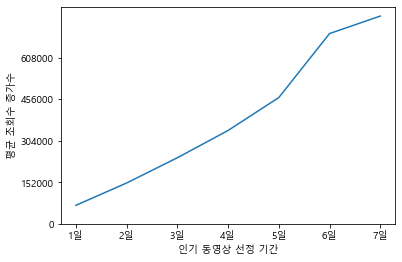

In [29]:
analysis('조회수')

유튜버구독자수 상승
1일: 유튜버구독자수 평균 504 증가
2일: 유튜버구독자수 평균 1688 증가
3일: 유튜버구독자수 평균 3141 증가
4일: 유튜버구독자수 평균 5378 증가
5일: 유튜버구독자수 평균 7961 증가
6일: 유튜버구독자수 평균 12629 증가
7일: 유튜버구독자수 평균 17889 증가
8일: 유튜버구독자수 평균 19400 증가


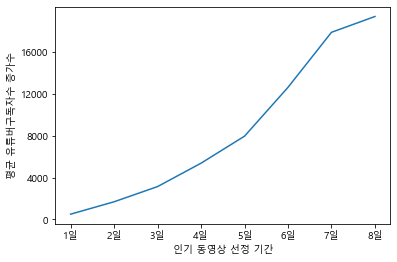

In [19]:
analysis('유튜버구독자수')

통합 데이터


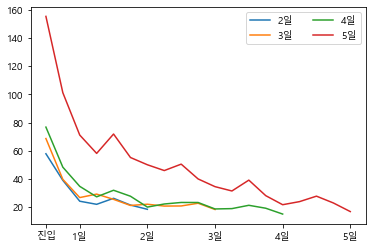

2일 유지


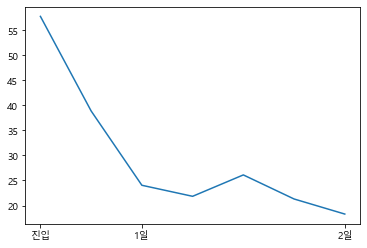

3일 유지


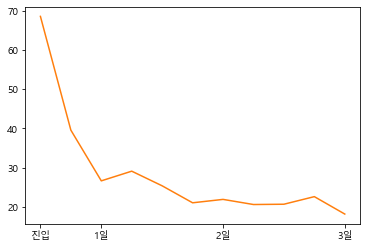

4일 유지


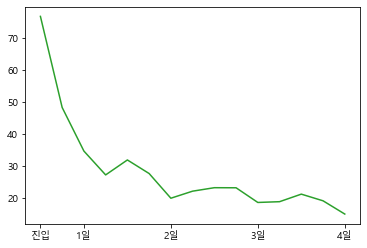

5일 유지


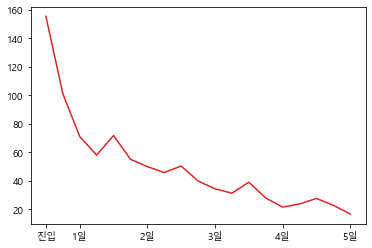

In [32]:
# 분석 2 --------------------------------------------------------------------------------------

# 이상치 제거
v_uc,v_lc = outlier(youtube_50_table['조회수'])
y_table = youtube_50_table[youtube_50_table['조회수']<v_uc]

idx = 0
plot_y = {}
count = [0,0,0,0]


for title in y_table['제목'].unique():
    # 제목 데이터 개수 확인
    t_len=len(y_table[y_table['제목'] == title])
    # 개수로 유지 기간 확인 (1개 게시물당 6시간 차이)
    if t_len in (8,12,16,20):
        for i in range(0,len(y_table[y_table['제목'] == title])-1):
            # 6시간씩 조회수 차이 저장
            try:
                plot_y[t_len][i] += (y_table[y_table['제목'] == title].iloc[i+1,1]-y_table[y_table['제목'] == title].iloc[i,1])
            except:
                # 누적 조회수를 구하기위하여 초기값을 정수형으로 지정
                try:
                    plot_y[t_len].append(0)                
                    plot_y[t_len][i] += (y_table[y_table['제목'] == title].iloc[i+1,1]-y_table[y_table['제목'] == title].iloc[i,1])
                except:
                    plot_y[t_len] = [0]
                    plot_y[t_len].append(0) 
                    plot_y[t_len][i] += (y_table[y_table['제목'] == title].iloc[i+1,1]-y_table[y_table['제목'] == title].iloc[i,1])
        # 기간당 개수 구함
        count[round((t_len/4)-2)] += 1

# 통합 데이터 그래프화
print('통합 데이터')
plt.plot(np.array(plot_y[8])/count[0], label='2일')
plt.plot(np.array(plot_y[12])/count[1], label='3일')
plt.plot(np.array(plot_y[16])/count[2], label='4일')
plt.plot(np.array(plot_y[20])/count[3], label='5일')
plt.legend(loc='best', ncol=2)
plt.xticks([0, 2, 6, 10, 14, 18],['진입','1일','2일','3일','4일','5일'])
plt.show()

# 기간당 데이터 그래프화
print('2일 유지')
plt.plot(np.array(plot_y[8])/count[0])
plt.xticks([0, 2, 6],['진입','1일','2일'])
plt.show()

print('3일 유지')
plt.plot(np.array(plot_y[12])/count[1], label='3일',color='C1')
plt.xticks([0, 2, 6, 10],['진입','1일','2일','3일'])
plt.show()

print('4일 유지')
plt.plot(np.array(plot_y[16])/count[2], label='4일',color='C2')
plt.xticks([0, 2, 6, 10, 14],['진입','1일','2일','3일','4일'])
plt.show()

print('5일 유지')
plt.plot(np.array(plot_y[20])/count[3], label='5일',color='C3')
plt.xticks([0, 2, 6, 10, 14, 18],['진입','1일','2일','3일','4일','5일'])
plt.show()

In [33]:
# 분석 3 -------------------------------------------------------------------------------

# 인기 급상승 동영상 보유 유튜브 채널 TOP100 데이터 프레임
youtuber_count=pd.DataFrame(youtube_50_table.drop_duplicates(['제목'])['유튜버'].value_counts().head(100))

# 인기 급상승 동영상 보유 유튜브 채널 TOP10
youtuber_count.rename(columns={'유튜버':'동영상개수'}).head(10)

,동영상개수
스튜디오 와플 - STUDIO WAFFLE,27
워크맨-Workman,24
채널 십오야,23
숏박스,23
파뿌리,22
임영웅,21
SMTOWN,20
HYBE LABELS,19
짧은대본 ShortPaper,18
놀면 뭐하니?,18


In [36]:
# 정리된 엑셀 파일 불러옴
youtuber_category = pd.read_excel(f'category.xlsx')

youtuber_category

,종합 컨텐츠,"드라마, 예능 하이라이트",스포츠,연예인,웹 예능,음악,기획사,웹 애니,뉴스,vlog,...,먹방,웹 드라마,스포츠 선수,요리,전자기기,여행,춤,메이크업,헬스,다큐
0,파뿌리,놀면 뭐하니?,스브스스포츠 SUBUSU SPORTS,임영웅,스튜디오 와플 - STUDIO WAFFLE,딩고 뮤직 / dingo music,SMTOWN,총몇명,KBS News,해쭈 [HAEJOO],...,천뚱TV,짧은대본 ShortPaper,꽉잡아윤기-Kwakyoongy,취미로 요리하는 남자 Yonam,ITSub잇섭,곽튜브KWAKTUBE,STUDIO CHOOM [스튜디오 춤],LeoJ Makeup,김종국 GYM JONG KOOK,EBSDocumentary (EBS 다큐)
1,배말랭,SBS Entertainment,Tottenham Hotspur,BANGTANTV,워크맨-Workman,Mnet K-POP,HYBE LABELS,장삐쭈,엠빅뉴스,토모토모TomoTomo,...,빅페이스 BIGFACE,진용진,정찬성 Korean Zombie,고기남자 MeatMan,NaN,NaN,NaN,NaN,NaN,NaN
2,영국남자 Korean Englishman,tvN D ENT,스포츠머그 - SPORTSMUG,NCT DREAM,채널 십오야,M2,AOMGOFFICIAL,아리의 이야기Ahri's Story[영상툰],MBCNEWS,yoovlog,...,tzuyang쯔양,픽고 PICKGO,리춘수 [이천수],NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,박씨집안,유 퀴즈 온 더 튜브,tvN SPORTS,NCT,문명특급 - MMTG,KBS Kpop,starshipTV,소맥거핀,SBS 뉴스,도장TV,...,성시경 SUNG SI KYUNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,허팝Heopop,디글 :Diggle,스포츠타임,SEVENTEEN,달라스튜디오,MBCkpop,JYP Entertainment,짤툰,YTN news,LunLuns,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,올리버쌤,런닝맨 - 스브스 공식 채널,무채색 필름,(G)I-DLE (여자)아이들 (Official YouTube Channel),시즌비시즌 Season B Season,스브스케이팝 / SBS KPOP,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,사나고 Sanago,JTBC Entertainment,Shoot for Love 슛포러브,NCT 127,M드로메다 스튜디오,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,침착맨,MBC 미스터리 : 심야괴담회 X 서프라이즈,스브스 예능맛집,IVE,Pixid,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,김숙티비kimsookTV,샾잉 #ing,MBC스포츠탐험대,officialpsy,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,걍밍경,KBS Entertain,SPOTV 오리지널,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# 카테고리별 개수
pd.DataFrame(youtuber_category.count()).rename(columns={0:'개수'})

,개수
종합 컨텐츠,10
"드라마, 예능 하이라이트",10
스포츠,10
연예인,9
웹 예능,8
음악,6
기획사,5
웹 애니,5
뉴스,5
vlog,5
